In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/palanil/OneDrive - Hathaway Dinwiddie/Desktop/Analytics Vidhya/Seventh Assignment/nyc_taxi_trip_duration.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.columns
data.shape

(729322, 11)

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [7]:
data.dtypes[data.dtypes == 'float']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [8]:
data.dtypes[data.dtypes == 'category']

Series([], dtype: object)

In [9]:
#Converting Data types to Integer
data['trip_duration'] = data['trip_duration'].astype('int64')


In [10]:
#Converting Data types to Float
# latitude & longitude pickup and drop off to be float

data['pickup_longitude'] = data['pickup_longitude'].astype('float')
data['pickup_latitude'] = data['pickup_latitude'].astype('float')
data['dropoff_longitude'] = data['dropoff_longitude'].astype('float')
data['dropoff_latitude'] = data['dropoff_latitude'].astype('float')

In [11]:
#converting data types to category
#vendor_id, passenger count and store&fwd will be changed to category
data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
data['passenger_count'] = data['passenger_count'].astype('category')

In [12]:
#converting data types to date&time
date = pd.DatetimeIndex(data[('pickup_datetime')])

In [13]:
# extracting new columns from "pickp_updatetime"

# last day of year when transaction was done
data['doy_ls_tran_pickup'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran_pickup'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran_pickup'] = date.month

# day of week when last transaction was done
data['dow_ls_tran_pickup'] = date.dayofweek

#hours
data['hrs_of_day_pickup'] = date.hour

#minutes
data['minute_of_day_pickup'] = date.minute

#seconds
data['seconds_of_day_pickup'] = date.second

<ipython-input-13-5b47f1e7bb6b>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['woy_ls_tran_pickup'] = date.weekofyear


In [14]:
date1 = pd.DatetimeIndex(data[('dropoff_datetime')])

In [15]:
# extracting new columns from "dropoff_updatetime"

# last day of year when dropoff was done
data['doy_ls_tran_drop_off'] = date1.dayofyear

# week of year when last transaction was done
data['woy_ls_tran_drop_off'] = date1.weekofyear

# month of year when dropoff was done
data['moy_ls_tran_drop_off'] = date1.month

# day of week when dropoff was done
data['dow_ls_tran_drop_off'] = date1.dayofweek

#hours
data['hrs_of_day_drop_off'] = date1.hour

#MINUTES
data['minute_of_day_drop_off'] = date1.minute

#SECONDS
data['seconds_of_day_drop_off'] = date1.second

<ipython-input-15-714304ce15ac>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['woy_ls_tran_drop_off'] = date1.weekofyear


In [16]:
data[['pickup_datetime','doy_ls_tran_pickup','woy_ls_tran_pickup','moy_ls_tran_pickup','dow_ls_tran_pickup','dropoff_datetime','hrs_of_day_pickup','minute_of_day_pickup','seconds_of_day_pickup','doy_ls_tran_drop_off','woy_ls_tran_drop_off','moy_ls_tran_drop_off','dow_ls_tran_drop_off','hrs_of_day_drop_off','minute_of_day_drop_off','seconds_of_day_drop_off']].head()

,pickup_datetime,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,dropoff_datetime,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off
0,2016-02-29 16:40:21,60,9,2,0,2016-02-29 16:47:01,16,40,21,60,9,2,0,16,47,1
1,2016-03-11 23:35:37,71,10,3,4,2016-03-11 23:53:57,23,35,37,71,10,3,4,23,53,57
2,2016-02-21 17:59:33,52,7,2,6,2016-02-21 18:26:48,17,59,33,52,7,2,6,18,26,48
3,2016-01-05 09:44:31,5,1,1,1,2016-01-05 10:03:32,9,44,31,5,1,1,1,10,3,32
4,2016-02-17 06:42:23,48,7,2,2,2016-02-17 06:56:31,6,42,23,48,7,2,2,6,56,31


In [17]:
data.dtypes
pd.set_option('display.max_columns', None)

In [18]:
#viewing after all columns is converted into the right category types
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,9,2,0,16,40,21,60,9,2,0,16,47,1
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,10,3,4,23,35,37,71,10,3,4,23,53,57
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,7,2,6,17,59,33,52,7,2,6,18,26,48
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,1,9,44,31,5,1,1,1,10,3,32
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,7,2,2,6,42,23,48,7,2,2,6,56,31


In [19]:
#viewing the distance between latitude and longitude to try and capture the distance.

data['diff_in_pickup_longitude'] = data['pickup_longitude'] - data['dropoff_longitude']
data['diff_in_pickup_latitude'] = data['pickup_latitude'] - data['dropoff_latitude']
data['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [20]:
#converting trip duration in seconds to minutes
data['trip_duration']=data['trip_duration']/60

In [21]:
data['trip_duration']

0          6.666667
1         18.333333
2         27.250000
3         19.016667
4         14.133333
            ...    
729317     4.933333
729318     5.250000
729319    11.216667
729320     7.450000
729321    20.400000
Name: trip_duration, Length: 729322, dtype: float64

In [22]:
data['vendor_id']

0         2
1         1
2         2
3         2
4         1
         ..
729317    2
729318    1
729319    1
729320    1
729321    2
Name: vendor_id, Length: 729322, dtype: category
Categories (2, int64): [1, 2]

In [23]:
#converting geo latitudes and longitudes into Kms.
import numpy as np
import mpu

In [24]:
for haversine_dist in data:
    data["haversine_dist"] = data.apply(lambda x:
                                  mpu.haversine_distance((x["pickup_latitude"], x["pickup_longitude"]),
                                                         (x["dropoff_latitude"], x["dropoff_longitude"])), axis=1)

In [25]:
#Datatable after everything is converted. Here we are finished with variable assignment
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,diff_in_pickup_longitude,diff_in_pickup_latitude,haversine_dist
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,0.009956,0.007710,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,0.006439,0.036812,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,-0.049286,-0.053459,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,-0.004890,-0.020908,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,-0.028938,-0.032162,4.328534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,-0.013283,0.000599,1.120223
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.004654,0.005524,0.728705
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,0.003639,0.020489,2.298776
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.006844,-0.005569,0.846316


In [26]:
#finding mean KDE plots and distribution for trip duration
print(data['trip_duration'].mean())

15.870485555991447


In [27]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,diff_in_pickup_longitude,diff_in_pickup_latitude,haversine_dist
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,0.009956,0.007710,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,0.006439,0.036812,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,-0.049286,-0.053459,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,-0.004890,-0.020908,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,-0.028938,-0.032162,4.328534


In [28]:
print(data['haversine_dist'].mean())
print(data['trip_duration'].mean())

3.4411386475467385
15.870485555991447


In [29]:
#on average each trip takes about 3.4 kilometers and 15.37 minutes to complete.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


#Univariate analysis on single variable trip_duration
list of hypothesis:
    1. trip_duration/haversine distance has a normal distribution.
    2. No skewness/kurtosis present.
    

In [31]:
def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil

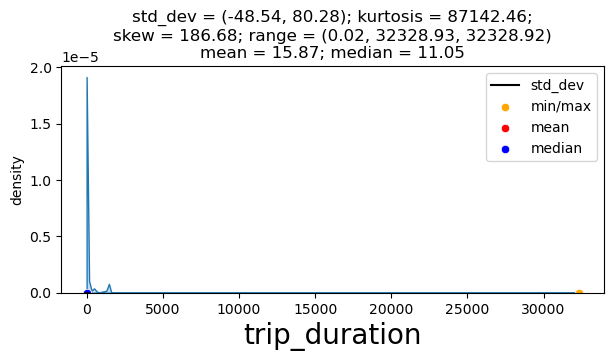

In [32]:
UVA_numeric(data, ['trip_duration'])


In [33]:
# Considering the kurtosis and skewness for all the values, outliers/extreme values are present.

C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil

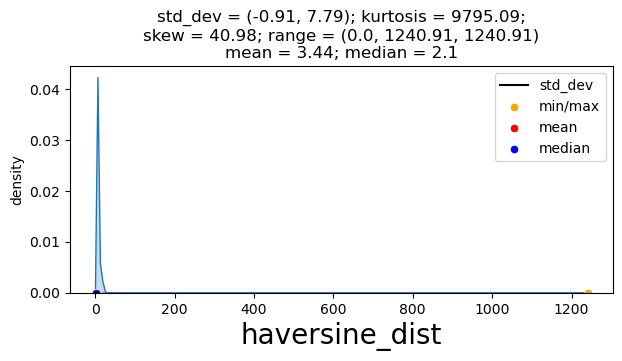

In [34]:
UVA_numeric(data, ['haversine_dist'])

In [35]:
data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [36]:
data.dtypes


id                            object
vendor_id                   category
pickup_datetime               object
dropoff_datetime              object
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
doy_ls_tran_pickup             int64
woy_ls_tran_pickup             int64
moy_ls_tran_pickup             int64
dow_ls_tran_pickup             int64
hrs_of_day_pickup              int64
minute_of_day_pickup           int64
seconds_of_day_pickup          int64
doy_ls_tran_drop_off           int64
woy_ls_tran_drop_off           int64
moy_ls_tran_drop_off           int64
dow_ls_tran_drop_off           int64
hrs_of_day_drop_off            int64
minute_of_day_drop_off         int64
seconds_of_day_drop_off        int64
diff_in_pickup_longitude     float64
diff_in_pickup_latitude      float64
h

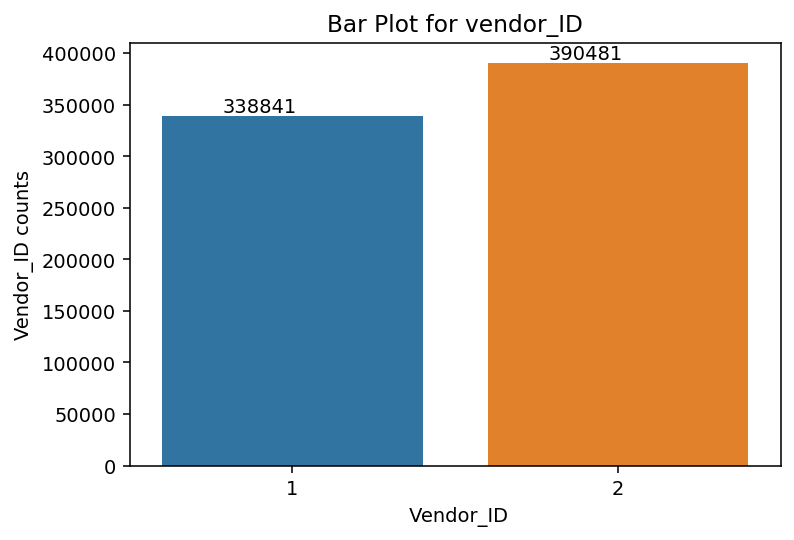

In [37]:
#segreating variables into group to perform univariate analysis.
#performing univariate analysis of categorical variables vendor_id and passenger_count
#performing bar charts.

plt.figure(dpi = 140)
ax= sns.barplot(x=data['vendor_id'].value_counts().index, y= data['vendor_id'].value_counts().values)
plt.xlabel(" Vendor_ID")
plt.ylabel('Vendor_ID counts')
plt.title("Bar Plot for vendor_ID")
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()



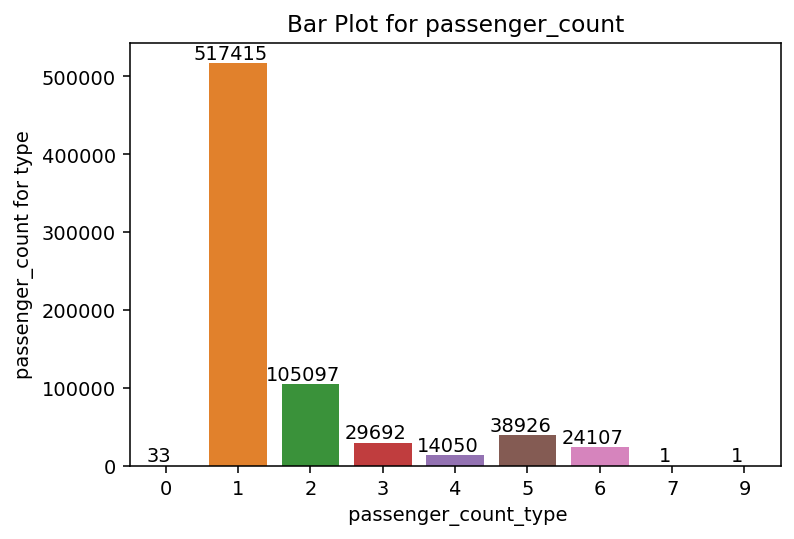

In [38]:
plt.figure(dpi = 140)
ax= sns.barplot(x=data['passenger_count'].value_counts().index, y= data['passenger_count'].value_counts().values)
plt.xlabel(" passenger_count_type")
plt.ylabel('passenger_count for type')
plt.title("Bar Plot for passenger_count")
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()
#values of 7,9 are either outliers or it has been entered due to error

In [39]:
#determining percentage for passenger_counts type
f= data['passenger_count'].value_counts()
f


i=f[:]/sum (f[:])
print (str(round(i, 2)))


1    0.71
2    0.14
5    0.05
3    0.04
6    0.03
4    0.02
0    0.00
7    0.00
9    0.00
Name: passenger_count, dtype: float64


In [40]:
#checking for missing values
data.isnull().sum()

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
doy_ls_tran_pickup          0
woy_ls_tran_pickup          0
moy_ls_tran_pickup          0
dow_ls_tran_pickup          0
hrs_of_day_pickup           0
minute_of_day_pickup        0
seconds_of_day_pickup       0
doy_ls_tran_drop_off        0
woy_ls_tran_drop_off        0
moy_ls_tran_drop_off        0
dow_ls_tran_drop_off        0
hrs_of_day_drop_off         0
minute_of_day_drop_off      0
seconds_of_day_drop_off     0
diff_in_pickup_longitude    0
diff_in_pickup_latitude     0
haversine_dist              0
dtype: int64

In [41]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(sing

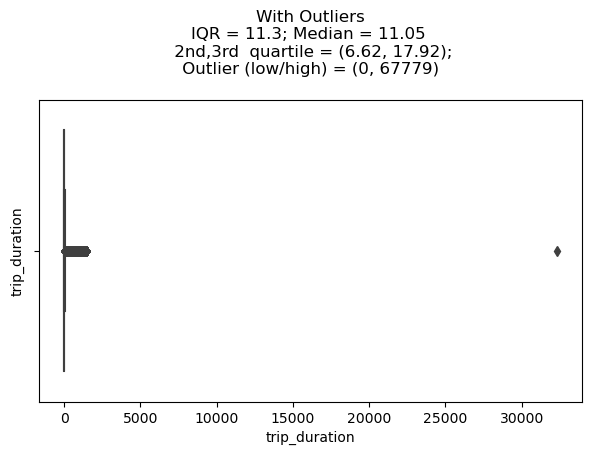

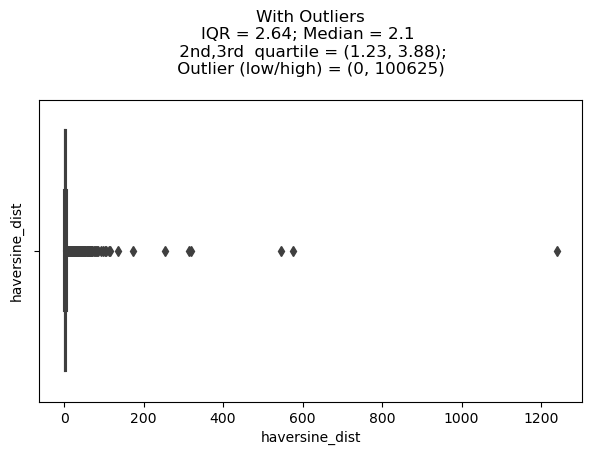

In [42]:
UVA_outlier(data, ['trip_duration'],)
UVA_outlier(data, ['haversine_dist'] )


C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(sing

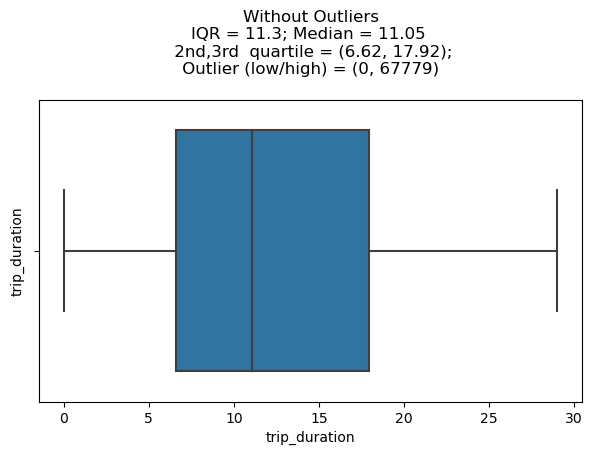

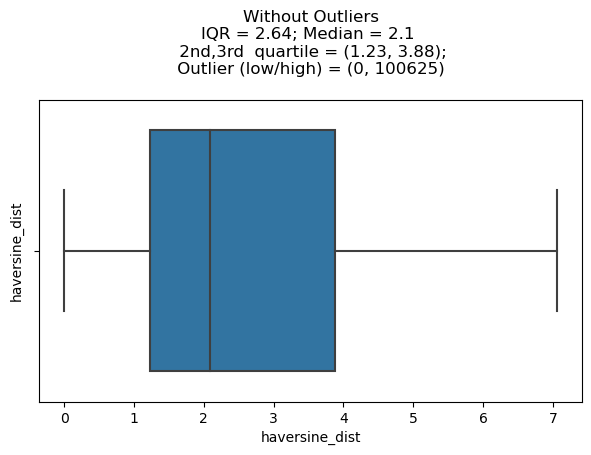

In [43]:
UVA_outlier(data, ['trip_duration'],include_outlier=False)
UVA_outlier(data, ['haversine_dist'],include_outlier=False )

In [44]:
#bivariane analysis of numberical-numberical
# isolating numerical datatypes only the three that I want to compare relationship with
numerical = data.filter(['trip_duration','haversine_dist','hrs_of_day_pickup'], axis=1)
numerical.dtypes

trip_duration        float64
haversine_dist       float64
hrs_of_day_pickup      int64
dtype: object

In [45]:
# calculating correlation
correlation = numerical.corr()
correlation

,trip_duration,haversine_dist,hrs_of_day_pickup
trip_duration,1.000000,0.125772,0.002979
haversine_dist,0.125772,1.000000,-0.016269
hrs_of_day_pickup,0.002979,-0.016269,1.000000


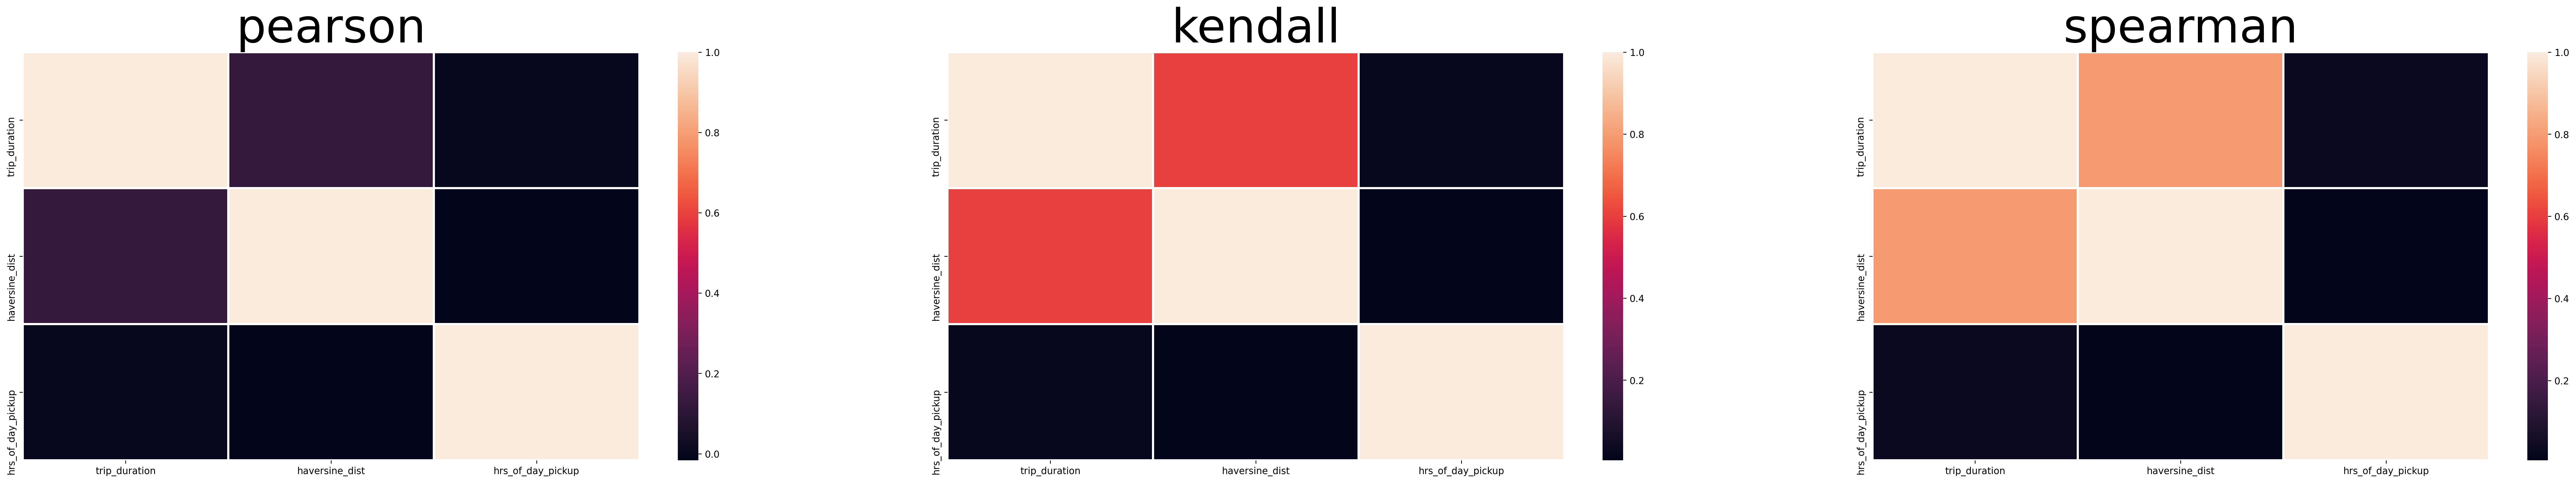

In [46]:
# plotting heatmap usill all methods for all numerical variables. I want to only compare trip duration and distance to see if there is any correlation and also seeing if pickup in the evening or morning has any difference.
plt.figure(figsize=(50,8), dpi=250)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=50)

In [47]:
import seaborn as sns

(0.0, 1000.0)

<Figure size 840x560 with 0 Axes>

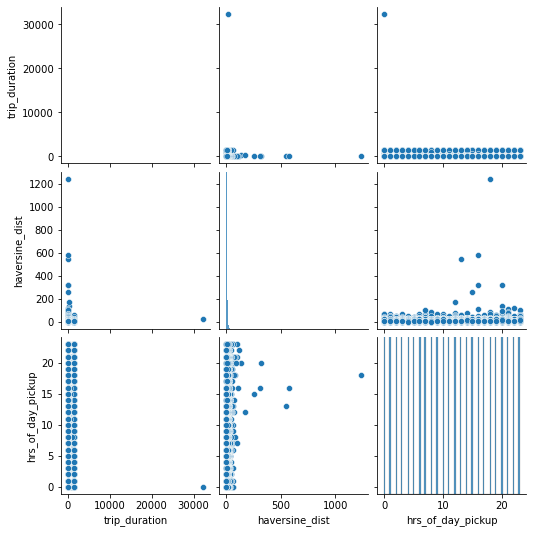

In [48]:
# scatter plot for transactional variables
plt.figure(dpi=140)

sns.pairplot(numerical)
plt.ylim(bottom=0, top=1000)

Bivariate analysis on continous categorical variable
List of hypothesis
   1. More passenger in the car takes more trip time
   2. Vendor_ID has a correlation for trip time
   3. Shorter distance will be used by 1 or 2 passenger people where as longer distance will be 3 or more people.

In [49]:
import matplotlib.pyplot as plt

In [50]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [51]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [52]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

In [55]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,diff_in_pickup_longitude,diff_in_pickup_latitude,haversine_dist
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,0.009956,0.007710,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,0.006439,0.036812,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,-0.049286,-0.053459,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,-0.004890,-0.020908,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,-0.028938,-0.032162,4.328534


C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


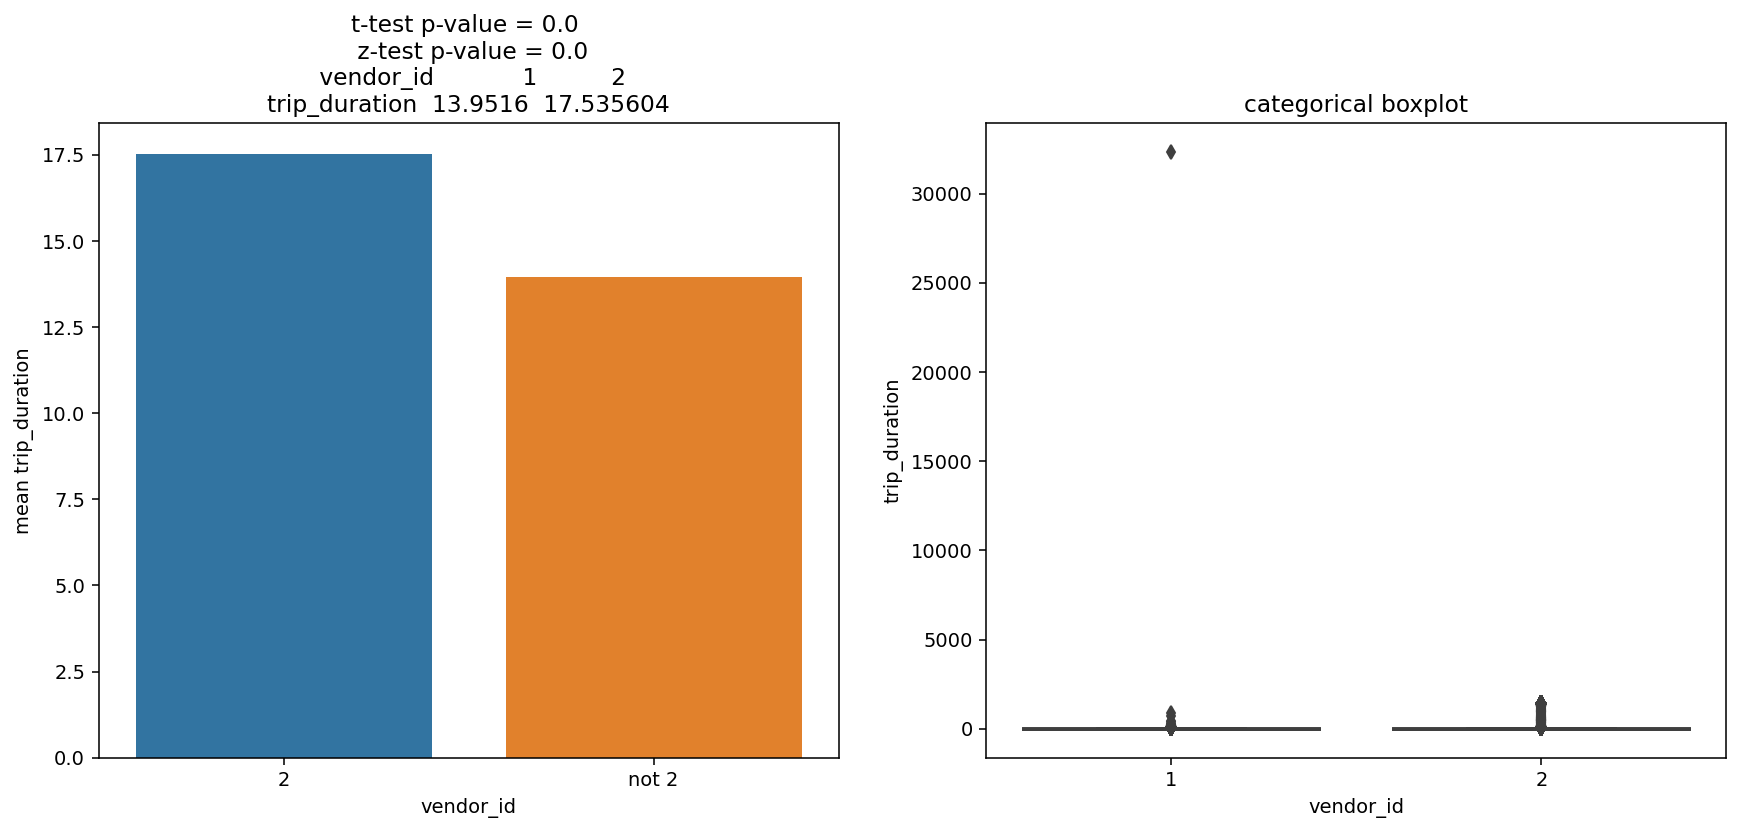

In [56]:
#comparing vendor_id with mean trip duration
Bivariate_cont_cat(data, 'trip_duration', 'vendor_id', 2)



In [59]:
#Comparing bivariate analysis on categorical variables - Nothing necessary as I dont believe there will be any relationship between categories.
data.dtypes

id                            object
vendor_id                   category
pickup_datetime               object
dropoff_datetime              object
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
doy_ls_tran_pickup             int64
woy_ls_tran_pickup             int64
moy_ls_tran_pickup             int64
dow_ls_tran_pickup             int64
hrs_of_day_pickup              int64
minute_of_day_pickup           int64
seconds_of_day_pickup          int64
doy_ls_tran_drop_off           int64
woy_ls_tran_drop_off           int64
moy_ls_tran_drop_off           int64
dow_ls_tran_drop_off           int64
hrs_of_day_drop_off            int64
minute_of_day_drop_off         int64
seconds_of_day_drop_off        int64
diff_in_pickup_longitude     float64
diff_in_pickup_latitude      float64
h


<style type='text/css'>
.CodeMirror{
font-size: 17px;
</style>


In [60]:
pip install jupyterthemes


Note: you may need to restart the kernel to use updated packages.


Performing Model Prediction - Seventh Assignment

In [61]:
#identifying categorical variables
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,diff_in_pickup_longitude,diff_in_pickup_latitude,haversine_dist
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,0.009956,0.007710,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,0.006439,0.036812,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,-0.049286,-0.053459,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,-0.004890,-0.020908,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,-0.028938,-0.032162,4.328534


In [62]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime               object
dropoff_datetime              object
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
doy_ls_tran_pickup             int64
woy_ls_tran_pickup             int64
moy_ls_tran_pickup             int64
dow_ls_tran_pickup             int64
hrs_of_day_pickup              int64
minute_of_day_pickup           int64
seconds_of_day_pickup          int64
doy_ls_tran_drop_off           int64
woy_ls_tran_drop_off           int64
moy_ls_tran_drop_off           int64
dow_ls_tran_drop_off           int64
hrs_of_day_drop_off            int64
minute_of_day_drop_off         int64
seconds_of_day_drop_off        int64
diff_in_pickup_longitude     float64
diff_in_pickup_latitude      float64
h

In [63]:
data.isnull().sum()

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
doy_ls_tran_pickup          0
woy_ls_tran_pickup          0
moy_ls_tran_pickup          0
dow_ls_tran_pickup          0
hrs_of_day_pickup           0
minute_of_day_pickup        0
seconds_of_day_pickup       0
doy_ls_tran_drop_off        0
woy_ls_tran_drop_off        0
moy_ls_tran_drop_off        0
dow_ls_tran_drop_off        0
hrs_of_day_drop_off         0
minute_of_day_drop_off      0
seconds_of_day_drop_off     0
diff_in_pickup_longitude    0
diff_in_pickup_latitude     0
haversine_dist              0
dtype: int64

In [64]:
data = data.drop(['diff_in_pickup_longitude','diff_in_pickup_latitude'],axis=1)

In [66]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316


In [65]:
#converting the categorical variable into zero and one
pd.get_dummies(data['store_and_fwd_flag'])

,N,Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
729317,1,0
729318,1,0
729319,1,0
729320,1,0


In [66]:
dummies = pd.get_dummies(data['store_and_fwd_flag'])

In [67]:
data = pd.concat([data.drop(['store_and_fwd_flag'],axis=1),dummies],axis=1)

In [68]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073,1,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111,1,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753,1,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097,1,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223,1,0
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705,1,0
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776,1,0
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316,1,0


In [69]:
data.dtypes

id                           object
vendor_id                  category
pickup_datetime              object
dropoff_datetime             object
passenger_count            category
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
trip_duration               float64
doy_ls_tran_pickup            int64
woy_ls_tran_pickup            int64
moy_ls_tran_pickup            int64
dow_ls_tran_pickup            int64
hrs_of_day_pickup             int64
minute_of_day_pickup          int64
seconds_of_day_pickup         int64
doy_ls_tran_drop_off          int64
woy_ls_tran_drop_off          int64
moy_ls_tran_drop_off          int64
dow_ls_tran_drop_off          int64
hrs_of_day_drop_off           int64
minute_of_day_drop_off        int64
seconds_of_day_drop_off       int64
haversine_dist              float64
N                             uint8
Y                             uint8
dtype: object

In [70]:
#dropping columns thats not needed for analysis
data = data.drop(['pickup_datetime','dropoff_datetime'],axis=1)

In [71]:
data

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073,1,0
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111,1,0
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753,1,0
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097,1,0
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223,1,0
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705,1,0
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776,1,0
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316,1,0


In [72]:
import math

In [73]:
def direction_lookup(data,destination_x, origin_x, destination_y, origin_y):

    deltaX = data.loc[destination_x] - data.loc[origin_x]

    deltaY = data.loc[destination_y] - data.loc[origin_y]

    degrees_temp = math.atan2(deltaX, deltaY)/math.pi*180

    if degrees_temp < 0:

        degrees_final = 360 + degrees_temp

    else:

        degrees_final = degrees_temp

    compass_brackets = ["N", "NE", "E", "SE", "S", "SW", "W", "NW", "N"]

    compass_lookup = round(degrees_final / 45)

    return compass_brackets[compass_lookup]

 


In [74]:
#finding direction of travel
for h in data:

    data['h'] =data.apply(direction_lookup, axis=1, args =('dropoff_longitude','pickup_longitude','dropoff_latitude','pickup_latitude'))

In [75]:
data

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,h
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073,1,0,SW
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111,1,0,S
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753,1,0,NE
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097,1,0,N
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534,1,0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223,1,0,E
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705,1,0,SW
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776,1,0,S
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316,1,0,NW


In [76]:
#mapping direction of travel to hot encoding
data['direction_of_Travel_cat'] = data['h'].map({'N':0, 'NE':1, 'E':2, 'SE':3, 'S':4, 'SW':5, 'W':6, 'NW':7})

In [77]:
data

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,h,direction_of_Travel_cat
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073,1,0,SW,5
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111,1,0,S,4
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753,1,0,NE,1
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097,1,0,N,0
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534,1,0,NE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223,1,0,E,2
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705,1,0,SW,5
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776,1,0,S,4
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316,1,0,NW,7


In [78]:
data = data.drop(['h'],axis = 1)

In [79]:
data

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073,1,0,5
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111,1,0,4
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753,1,0,1
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097,1,0,0
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223,1,0,2
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705,1,0,5
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776,1,0,4
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316,1,0,7


In [80]:
#finding outliers within numerical variables
data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,-73.973513,40.750919,-73.973422,40.751775,15.870486,91.882577,13.843884,3.518410,3.049081,13.611698,29.597785,29.468642,91.893805,13.842964,3.518764,3.053015,13.60616,29.631301,29.504039,3.441139,0.994461,0.005539,3.189793
std,0.069754,0.033594,0.069588,0.036037,64.410437,51.555655,8.558386,1.680661,1.954470,6.402853,17.332400,17.316949,51.556407,8.555423,1.680815,1.956866,6.48637,17.420089,17.322411,4.353132,0.074221,0.074221,2.208622
min,-121.933342,34.712234,-121.933304,32.181141,0.016667,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.991859,40.737335,-73.991318,40.735931,6.616667,48.000000,7.000000,2.000000,1.000000,9.000000,15.000000,14.000000,48.000000,7.000000,2.000000,1.000000,9.00000,15.000000,15.000000,1.232695,1.000000,0.000000,1.000000
50%,-73.981758,40.754070,-73.979759,40.754509,11.050000,92.000000,13.000000,4.000000,3.000000,14.000000,30.000000,29.000000,92.000000,13.000000,4.000000,3.000000,14.00000,30.000000,29.000000,2.095672,1.000000,0.000000,3.000000
75%,-73.967361,40.768314,-73.963036,40.769741,17.916667,136.000000,20.000000,5.000000,5.000000,19.000000,45.000000,44.000000,136.000000,20.000000,5.000000,5.000000,19.00000,45.000000,45.000000,3.876481,1.000000,0.000000,5.000000
max,-65.897385,51.881084,-65.897385,43.921028,32328.933333,182.000000,53.000000,6.000000,6.000000,23.000000,59.000000,59.000000,183.000000,53.000000,7.000000,6.000000,23.00000,59.000000,59.000000,1240.908677,1.000000,1.000000,7.000000


In [81]:
# Trip duration and haversine distance has some outliers that needs to be addressed.

In [82]:
data['trip_duration'].quantile(0.25), data['trip_duration'].quantile(0.75)

(6.616666666666666, 17.916666666666668)

In [83]:
IQR = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
IQR

11.3

In [84]:
Q1 = data['trip_duration'].quantile(0.25)
Q3 = data['trip_duration'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-10.333333333333336, 34.866666666666674)

In [85]:
#review trip outliers to see the entire data on it to see any crazy outliers/reasons. Same is for haversine distance


In [86]:
A = data['trip_duration'].loc[data['trip_duration']>34.8666]

In [87]:
sorted(A,reverse = True)

[32328.933333333334,
 1439.85,
 1439.7833333333333,
 1439.6333333333334,
 1439.6166666666666,
 1439.4833333333333,
 1439.4833333333333,
 1439.45,
 1439.4166666666667,
 1439.4,
 1439.3833333333334,
 1439.3666666666666,
 1439.3666666666666,
 1439.35,
 1439.35,
 1439.3333333333333,
 1439.3,
 1439.2833333333333,
 1439.2833333333333,
 1439.2666666666667,
 1439.2666666666667,
 1439.2666666666667,
 1439.25,
 1439.2333333333333,
 1439.2333333333333,
 1439.2333333333333,
 1439.2166666666667,
 1439.2166666666667,
 1439.2,
 1439.2,
 1439.1833333333334,
 1439.1833333333334,
 1439.1833333333334,
 1439.15,
 1439.15,
 1439.1166666666666,
 1439.1,
 1439.1,
 1439.1,
 1439.0833333333333,
 1439.0833333333333,
 1439.0833333333333,
 1439.0666666666666,
 1439.05,
 1439.0333333333333,
 1439.0,
 1439.0,
 1439.0,
 1439.0,
 1439.0,
 1438.9833333333333,
 1438.9833333333333,
 1438.9833333333333,
 1438.9666666666667,
 1438.95,
 1438.95,
 1438.9333333333334,
 1438.9333333333334,
 1438.9333333333334,
 1438.933333333

In [88]:
data.sort_values(by ='trip_duration', ascending = False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
21813,id1864733,1,1,-73.789650,40.643559,-73.956810,40.773087,32328.933333,5,1,1,1,0,19,42,27,4,1,2,11,8,38,20.148664,1,0,7
259437,id0593332,2,1,-73.781952,40.644688,-73.993874,40.745926,1439.850000,152,22,5,1,13,0,39,153,22,6,2,13,0,30,21.117104,1,0,7
119185,id2837671,2,1,-73.992279,40.749729,-73.962524,40.800770,1439.783333,182,26,6,3,16,37,52,183,26,7,4,16,37,39,6.203902,1,0,1
177225,id3782820,2,1,-73.781990,40.644722,-73.980675,40.724918,1439.633333,133,19,5,3,13,48,19,134,19,5,4,13,47,57,18.978561,1,0,6
496391,id2307896,2,1,-74.000504,40.732121,-73.994202,40.712418,1439.616667,135,19,5,5,4,48,5,136,19,5,6,4,47,42,2.254313,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672240,id2072503,1,1,-73.807213,40.658192,-73.807259,40.658051,0.016667,20,3,1,2,5,53,45,20,3,1,2,5,53,46,0.016163,1,0,4
102646,id2536510,1,1,-73.940384,40.786423,-73.940300,40.786373,0.016667,108,15,4,6,11,44,49,108,15,4,6,11,44,50,0.008963,1,0,3
533760,id0948644,2,0,-73.987595,40.719997,-73.987595,40.720005,0.016667,53,8,2,0,0,40,25,53,8,2,0,0,40,26,0.000848,1,0,0
512833,id2697717,2,2,-73.983154,40.767159,-73.983238,40.767097,0.016667,87,12,3,6,12,55,52,87,12,3,6,12,55,53,0.009799,1,0,5


In [89]:
data['trip_duration'].loc[data['trip_duration']>34.8666] = whisker_2

C:\Users\palanil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [90]:
data.sort_values(by ='trip_duration', ascending = False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
107822,id0048627,1,1,-73.789604,40.643089,-73.984245,40.766953,34.866667,142,20,5,5,0,3,22,142,20,5,5,0,43,29,21.421680,1,0,7
389021,id0389622,1,4,-74.002693,40.714214,-73.988655,40.749317,34.866667,160,23,6,2,12,36,33,160,23,6,2,13,29,50,4.078550,1,0,0
689576,id3464017,2,6,-73.994644,40.750416,-73.932335,40.686874,34.866667,84,12,3,3,0,47,27,84,12,3,3,1,35,17,8.803215,1,0,3
235426,id3879680,2,5,-73.950890,40.776848,-74.006668,40.705887,34.866667,142,20,5,5,23,54,5,143,20,5,6,0,30,16,9.183841,1,0,5
268406,id1548574,1,1,-73.991920,40.750095,-73.989075,40.667171,34.866667,120,17,4,4,11,2,23,120,17,4,4,11,57,14,9.223835,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672240,id2072503,1,1,-73.807213,40.658192,-73.807259,40.658051,0.016667,20,3,1,2,5,53,45,20,3,1,2,5,53,46,0.016163,1,0,4
102646,id2536510,1,1,-73.940384,40.786423,-73.940300,40.786373,0.016667,108,15,4,6,11,44,49,108,15,4,6,11,44,50,0.008963,1,0,3
533760,id0948644,2,0,-73.987595,40.719997,-73.987595,40.720005,0.016667,53,8,2,0,0,40,25,53,8,2,0,0,40,26,0.000848,1,0,0
512833,id2697717,2,2,-73.983154,40.767159,-73.983238,40.767097,0.016667,87,12,3,6,12,55,52,87,12,3,6,12,55,53,0.009799,1,0,5


C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil

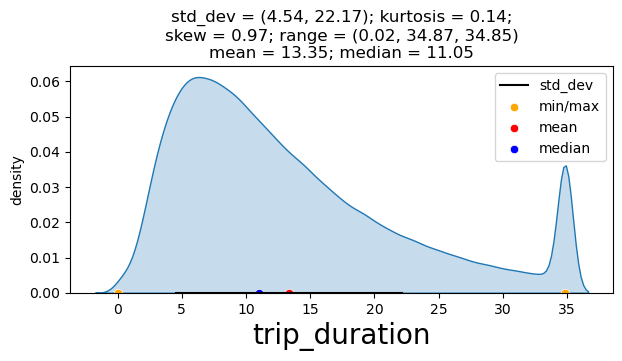

In [91]:
#trip duration after changing outliers to whisker_3. 
# Should I have changed it to mean?
UVA_numeric(data, ['trip_duration'])

In [92]:
IQR1 = data['haversine_dist'].quantile(0.75) - data['haversine_dist'].quantile(0.25)
IQR1



2.643786067322629

In [93]:
#finding whiskers of haversine dist
Q11 = data['haversine_dist'].quantile(0.25)
Q33 = data['haversine_dist'].quantile(0.75)

whisker_11 = Q11 - (1.5*IQR)
whisker_22 = Q33 + (1.5*IQR)

whisker_11, whisker_22

(-15.717304966838503, 20.82648110048413)

In [94]:
data.sort_values(by ='haversine_dist', ascending = False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
244913,id2306955,1,1,-72.809669,51.881084,-73.987228,40.750599,13.200000,128,18,5,5,18,58,53,128,18,5,5,19,12,5,1240.908677,1,0,4
621372,id2644780,1,2,-73.991325,40.750023,-79.518616,43.921028,34.866667,124,18,5,1,16,24,7,124,18,5,1,17,18,34,574.875442,1,0,7
441429,id0982904,1,2,-73.870682,40.773598,-79.817978,38.963852,34.866667,119,17,4,3,13,32,14,119,17,4,3,14,14,9,545.853499,1,0,6
654569,id0116374,1,1,-74.007095,40.717113,-76.963242,38.946033,4.700000,93,13,4,5,20,33,19,93,13,4,5,20,38,1,320.125775,1,0,5
697620,id0978162,1,4,-75.354332,34.712234,-73.834923,32.181141,14.583333,55,8,2,2,16,20,59,55,8,2,2,16,35,34,314.764203,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712763,id2574599,1,1,-73.994698,40.750404,-73.994698,40.750404,0.133333,38,5,2,6,11,23,38,38,5,2,6,11,23,46,0.000000,1,0,0
52157,id0627234,2,1,-73.972588,40.760632,-73.972588,40.760632,27.050000,176,25,6,4,17,26,39,176,25,6,4,17,53,42,0.000000,1,0,0
309678,id2389047,1,1,-73.869469,40.772755,-73.869469,40.772755,0.066667,91,13,3,3,11,55,37,91,13,3,3,11,55,41,0.000000,1,0,0
547442,id0130023,2,1,-73.947281,40.771080,-73.947281,40.771080,6.333333,118,17,4,2,10,5,46,118,17,4,2,10,12,6,0.000000,1,0,0


In [95]:
data['haversine_dist'].loc[data['haversine_dist']>34.8666] = whisker_22

C:\Users\palanil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\palanil

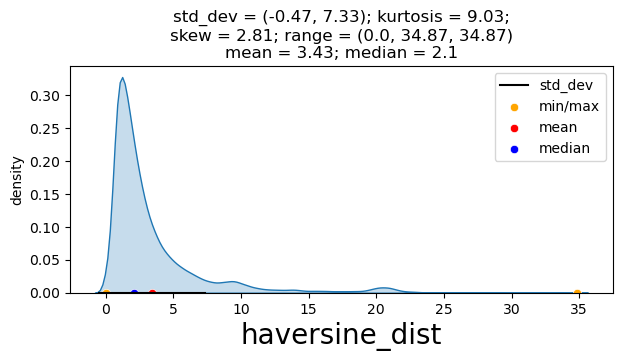

In [96]:
UVA_numeric(data, ['haversine_dist'])

In [97]:
numerical1 = data.filter(['trip_duration','haversine_dist'], axis=1)

In [98]:
corr3 = numerical1.corr()

In [99]:
corr3

,trip_duration,haversine_dist
trip_duration,1.000000,0.734472
haversine_dist,0.734472,1.000000


In [100]:
%matplotlib inline
import matplotlib as plt
plt.rcParams['agg.path.chunksize'] = 10000

<AxesSubplot:xlabel='trip_duration'>

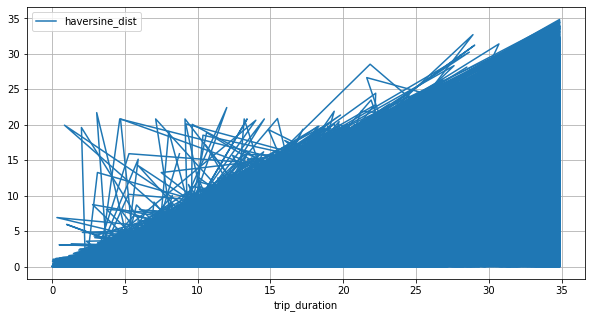

In [101]:
data.plot(x='trip_duration', y='haversine_dist', figsize=(10,5),grid = True)

In [103]:
import matplotlib.pyplot as plt

(0.0, 1000.0)

<Figure size 840x560 with 0 Axes>

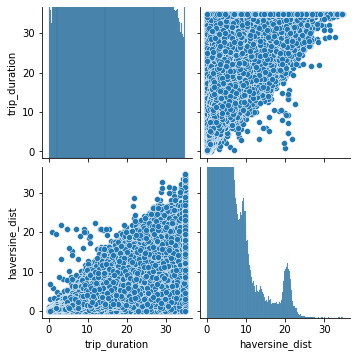

In [104]:
#checking linear relation between trip duration and distance. Seems to be linear

plt.figure(dpi=140)

sns.pairplot(numerical1)
plt.ylim(bottom=0, top=1000)

In [105]:
data_clean = data.copy()

In [106]:
data_clean

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073,1,0,5
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111,1,0,4
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753,1,0,1
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097,1,0,0
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223,1,0,2
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705,1,0,5
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776,1,0,4
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316,1,0,7


In [107]:
data_clean = data_clean.drop(['id', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [108]:
#removed ID that will not be needed for running regression

data_clean

,vendor_id,passenger_count,trip_duration,doy_ls_tran_pickup,woy_ls_tran_pickup,moy_ls_tran_pickup,dow_ls_tran_pickup,hrs_of_day_pickup,minute_of_day_pickup,seconds_of_day_pickup,doy_ls_tran_drop_off,woy_ls_tran_drop_off,moy_ls_tran_drop_off,dow_ls_tran_drop_off,hrs_of_day_drop_off,minute_of_day_drop_off,seconds_of_day_drop_off,haversine_dist,N,Y,direction_of_Travel_cat
0,2,1,6.666667,60,9,2,0,16,40,21,60,9,2,0,16,47,1,1.199073,1,0,5
1,1,2,18.333333,71,10,3,4,23,35,37,71,10,3,4,23,53,57,4.129111,1,0,4
2,2,2,27.250000,52,7,2,6,17,59,33,52,7,2,6,18,26,48,7.250753,1,0,1
3,2,6,19.016667,5,1,1,1,9,44,31,5,1,1,1,10,3,32,2.361097,1,0,0
4,1,1,14.133333,48,7,2,2,6,42,23,48,7,2,2,6,56,31,4.328534,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,4.933333,142,20,5,5,13,29,38,142,20,5,5,13,34,34,1.120223,1,0,2
729318,1,1,5.250000,53,8,2,0,0,43,11,53,8,2,0,0,48,26,0.728705,1,0,5
729319,1,1,11.216667,106,15,4,4,18,56,48,106,15,4,4,19,8,1,2.298776,1,0,4
729320,1,1,7.450000,171,24,6,6,9,50,47,171,24,6,6,9,58,14,0.846316,1,0,7


In [109]:
x = data_clean.drop(['trip_duration'],axis = 1)
y = data_clean['trip_duration']

In [110]:
#Running linear regression
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =train_test_split(x,y,random_state=56)

In [111]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [112]:
lr = LR()
lr.fit(train_x,train_y)

LinearRegression()

In [113]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 4.459922714709691


In [114]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     4.466313433250275


In [115]:
lr.coef_

array([ 1.59264734e-04,  5.17100630e-02, -2.34296693e+01,  3.98712868e-02,
       -1.42424676e+00, -6.75500353e-01, -1.00161903e+00, -1.78137607e-02,
       -2.82473051e-04,  2.34362453e+01, -6.46919505e-02,  1.54208202e+00,
        5.35714425e-01,  1.06524977e+00,  1.57458502e-02,  8.20832593e-05,
        1.62415075e+00, -6.36686307e-02,  6.36686307e-02, -5.11954487e-03])

Text(0.5, 1.0, 'Coefficient plot')

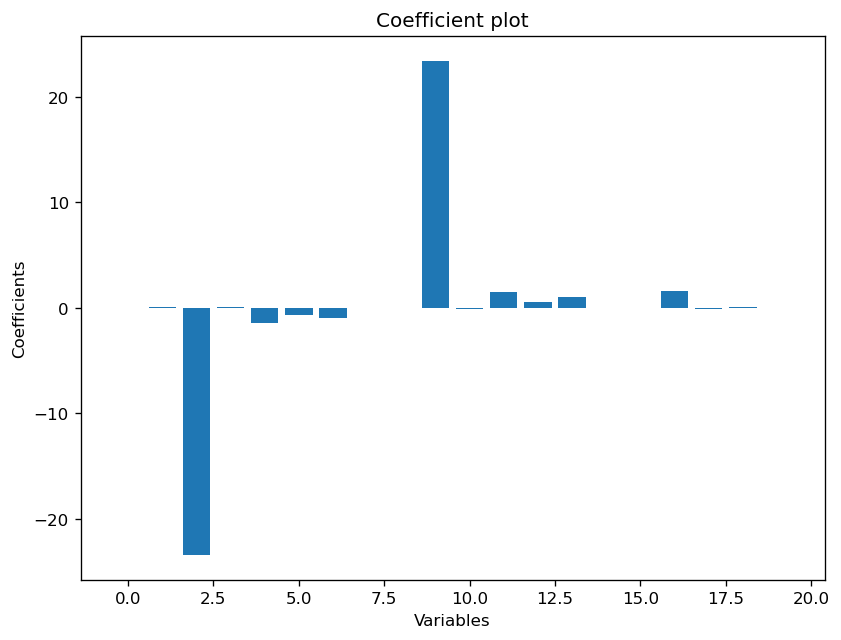

In [116]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [117]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals

,fitted values,predicted values,residuals
14908,34.866667,38.274121,-3.407454
87154,24.283333,13.780341,10.502992
666581,2.716667,10.589456,-7.872790
543467,34.866667,31.231460,3.635207
105193,6.700000,11.114828,-4.414828
...,...,...,...
186037,34.866667,10.367098,24.499569
348778,5.550000,8.482221,-2.932221
37103,14.083333,7.199339,6.883994
400091,3.783333,7.894554,-4.111220


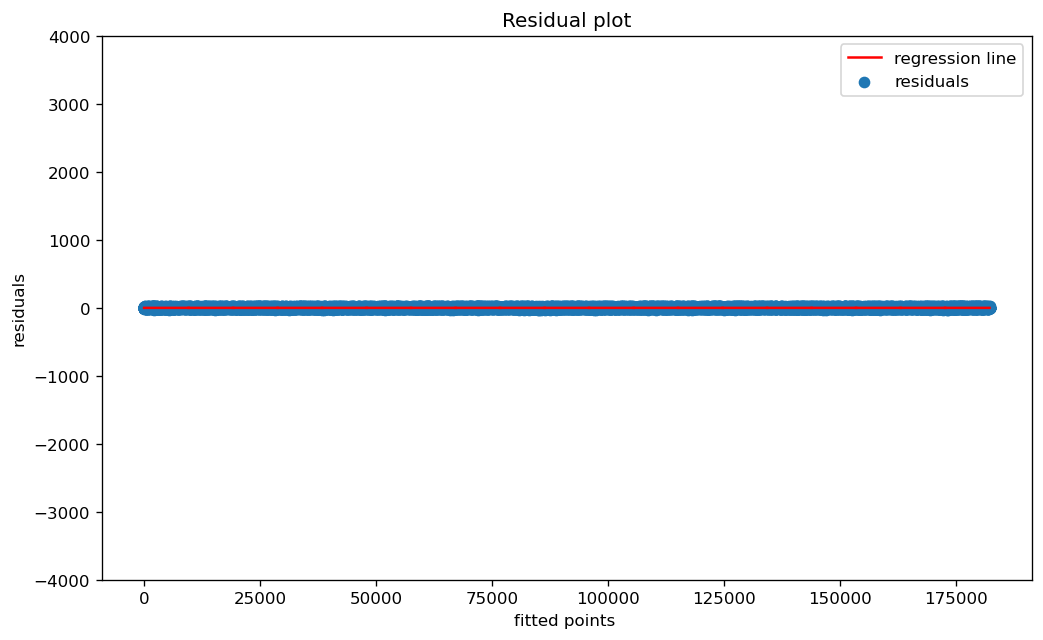

In [118]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,182331)
k = [0 for i in range(0,182331)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

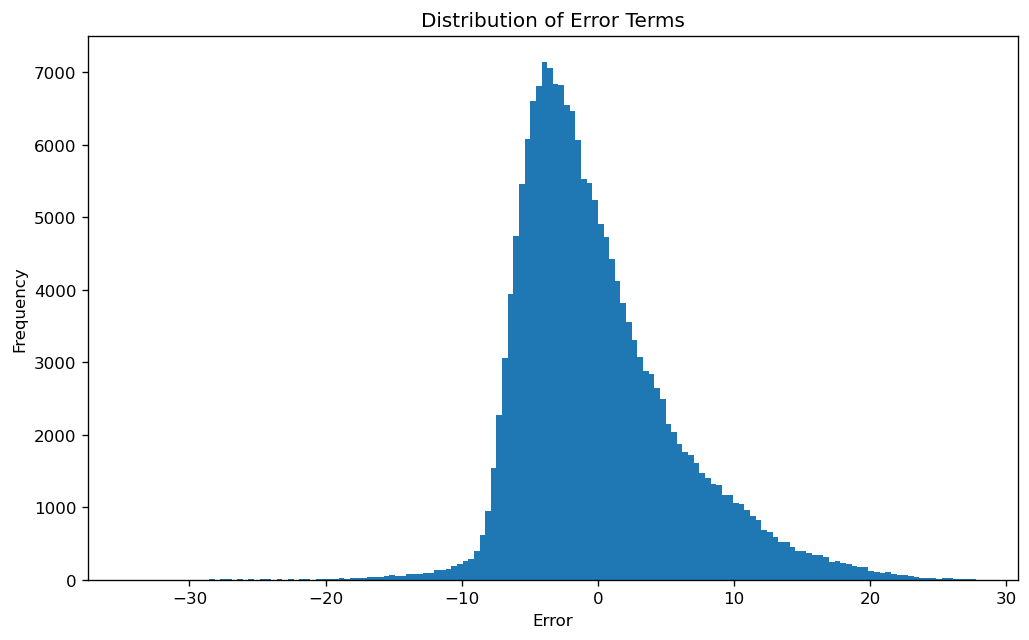

In [119]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

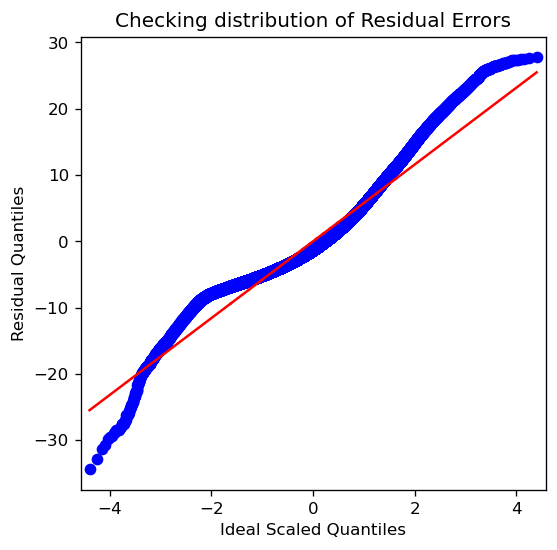

In [120]:
# importing the QQ-plot from the from the statsmodels

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [121]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [122]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [123]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 4.459922714709689


In [124]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     4.466313433250285


Text(0.5, 1.0, 'Normalized Coefficient plot')

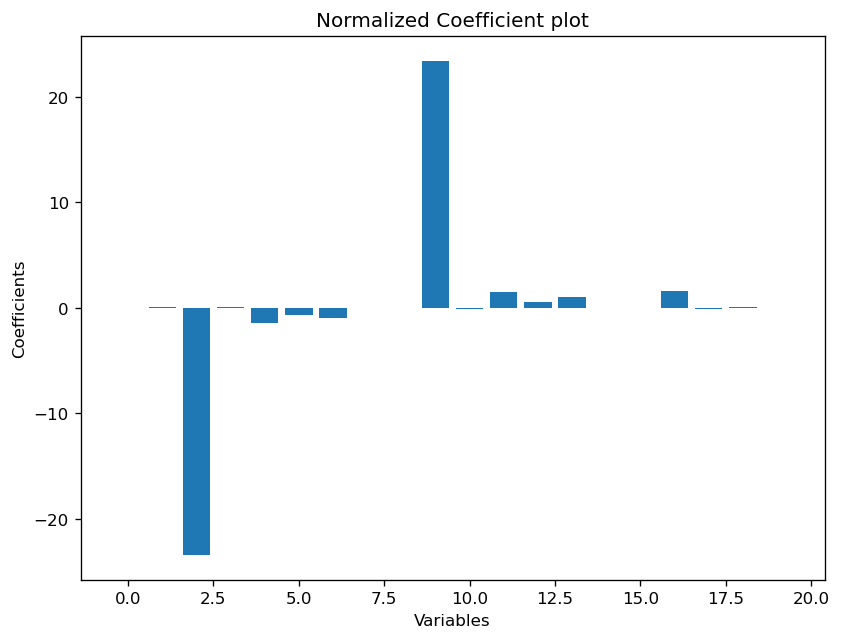

In [125]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [126]:
x = data_clean.drop(['trip_duration'], axis=1)
y = data_clean['trip_duration']
x.shape , y.shape

((729322, 20), (729322,))

In [127]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,vendor_id,0.000159
1,passenger_count,0.051710
2,doy_ls_tran_pickup,-23.429669
3,woy_ls_tran_pickup,0.039871
4,moy_ls_tran_pickup,-1.424247


In [128]:
#trying a higher coefficient model just to see if it makes sense to only isolate few variables vs a lot of variables.
sig_var = Coefficients[Coefficients.coefficient > 1]

In [129]:
sig_var

,Variable,coefficient
9,doy_ls_tran_drop_off,23.436245
11,moy_ls_tran_drop_off,1.542082
13,hrs_of_day_drop_off,1.065250
16,haversine_dist,1.624151


In [130]:
subset = data[sig_var['Variable'].values]
subset.head()

,doy_ls_tran_drop_off,moy_ls_tran_drop_off,hrs_of_day_drop_off,haversine_dist
0,60,2,16,1.199073
1,71,3,23,4.129111
2,52,2,18,7.250753
3,5,1,10,2.361097
4,48,2,6,4.328534


In [131]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [132]:
from sklearn.linear_model import LinearRegression as re
from sklearn.metrics import mean_absolute_error as mae

In [133]:
lr=LR(normalize = True)

lr.fit(train_x,train_y)

LinearRegression(normalize=True)

In [134]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 4.566302633788427


In [135]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     4.572780328667609


Text(0.5, 1.0, 'Normalized Coefficient plot')

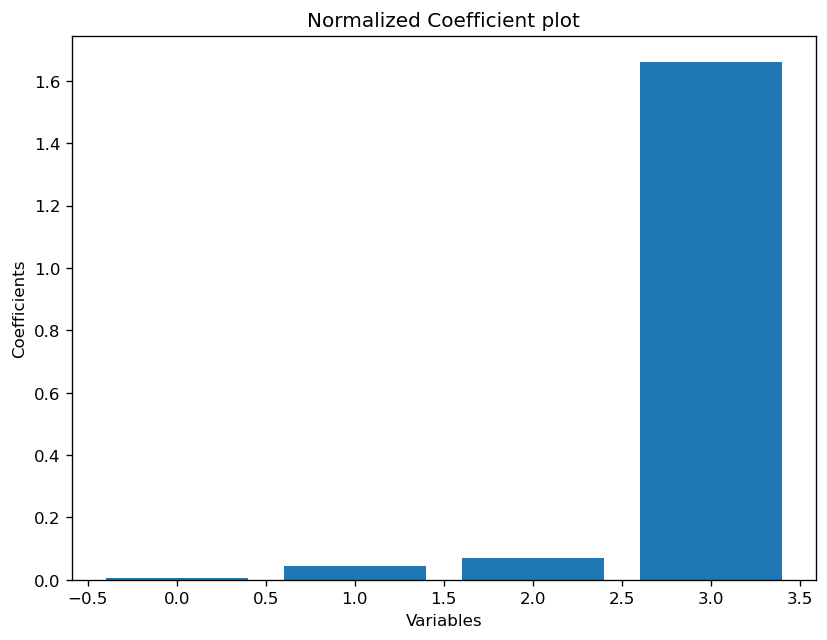

In [136]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')